### Combine the data from several files

In [1]:
import json
import numpy as np
from simulate import find_mean_std_mse

### load the data for the maximum nudges

In [2]:
def dict_keys_from_string_to_int(dictionary):
    return {int(k):v for k,v in dictionary.items()}

def files_to_dict(file_names):
    """ Load the data from the files and make keys into ints"""
    dictionaries = []
    for file_name in file_names:
        with open(file_name, 'r') as f:
            dictionaries.append(json.load(f))

    dictionaries = [dict_keys_from_string_to_int(i) for i in dictionaries]
    return dictionaries

def compare_settings(value_to_scores, min_value, max_value):
    value_to_average_scores = {}
    for i in range(min_value, max_value+1, 1):
        average_impacts = []
        for count, dirichlet_dict in enumerate(value_to_scores):
            try:
                average_impacts.append(np.mean(dirichlet_dict[i]))
            except KeyError:
                print("the {} file has variable {} missing".format(i, count))

        value_to_average_scores[i] = average_impacts

    return value_to_average_scores

def flip_sign_values_dict(dictionary):
    for key, values in dictionary.items():
        dictionary[key] = [-value for value in values]
        
    return dictionary

def find_max_scores_per_value(dictionaries, min_value, max_value):
    value_to_maximum_scores = {}
    for i in range(min_value, max_value+1, 1):
        impacts = []
        for count, dictionary in enumerate(dictionaries):
            try:
                impacts.append(dictionary[i])
            except KeyError:
                print("the {} file has variable {} missing".format(i, count))

        max_impacts = [max(scores) for scores in list(zip(*impacts))]
        value_to_maximum_scores[i] = max_impacts

    return value_to_maximum_scores

In [3]:
PATH = "data_experiments/"

#max local impact files
local_dirichlet_file_format = PATH + "max_impact_local_nudges{}_dirichlet.json" 
local_entropy_file_format = PATH + "max_impact_local_nudges{}_entropy0.75.json"
local_dirichlet_files = [local_dirichlet_file_format.format(i) for i in [2, 3, 7]]
local_dirichlet_files.append(PATH + "max_impact_local_nudges_dirichlet_ex9.json")
local_entropy75_files = [local_entropy_file_format.format(i) for i in [4,5,6,8]]

#max synergistic impact files
synergistic_dirichlet_file_format = PATH + "max_impact_synergistic_nudges_dirichlet_ex{}3.json"
synergistic_entropy75_file_format = PATH + "max_impact_synergistic_nudges_entropy0.75_ex{}3.json"
synergistic_dirichlet_files = [synergistic_dirichlet_file_format.format(i) for i in range(5, 9, 1)]
synergistic_entropy75_files = [synergistic_entropy75_file_format.format(i) for i in range(1, 5, 1)]

local_dirichlet_dicts = files_to_dict(local_dirichlet_files)
local_entropy75_dicts = files_to_dict(local_entropy75_files)
synergistic_dirichlet_dicts = files_to_dict(synergistic_dirichlet_files)
synergistic_entropy75_dicts = files_to_dict(synergistic_entropy75_files)


for local_dict in local_dirichlet_dicts:
    flip_sign_values_dict(local_dict)
for local_dict in local_entropy75_dicts:
    flip_sign_values_dict(local_dict)
for synergistic_dict in synergistic_dirichlet_dicts:
    flip_sign_values_dict(synergistic_dict)
for synergistic_dict in synergistic_entropy75_dicts:
    flip_sign_values_dict(synergistic_dict)

    
#load individual maximum nudges

individual_dirichlet_file = "max_impact_individual_nudges_dirichlet_first100samples.json"
individual_entropy75_file = "max_impact_individual_nudges_entropy75_first200samples.json"
individual_dirichlet_dict = files_to_dict([PATH+individual_dirichlet_file])[0]
individual_entropy75_dict = files_to_dict([PATH+individual_entropy75_file])[0]

#load global maximum nudges

global_dirichlet_file = "max_impact_global_nudges_dirichlet_first200samples.json"
global_entropy75_file = "max_impact_global_nudges_entropy75_first200samples.json"
global_dirichlet_dict = files_to_dict([PATH + global_dirichlet_file])[0]
global_entropy75_dict = files_to_dict([PATH + global_entropy75_file])[0]



### First inspect the local maximum nudges

In [4]:
print("inspect local dirichlet file")
average_scores_per_file_local_dirichlet = compare_settings(local_dirichlet_dicts, min_value=2, max_value=5)
print("inspect local entropy 75 file")
average_scores_per_file_local_entropy75 = compare_settings(local_entropy75_dicts, min_value=2, max_value=5)

print("the max local nudge impacts per file for dirichlet inputs")
print(average_scores_per_file_local_dirichlet)
print("")

print("the max local nudge impacts per file for entropy 75 inputs")
print(average_scores_per_file_local_entropy75)


inspect local dirichlet file
inspect local entropy 75 file
the 3 file has variable 1 missing
the 4 file has variable 1 missing
the 5 file has variable 1 missing
the max local nudge impacts per file for dirichlet inputs
{2: [0.0041993400982058672, 0.0041325181152722214, 0.0041970309982642092, 0.0038227142555419692], 3: [0.0019815468968107314, 0.0019545806012245962, 0.0020082390402741744, 0.0017937751013967478], 4: [0.00098430103732303131, 0.00096330037207914717, 0.00099112644064417322, 0.00085873924946417877], 5: [0.00047194631769634481, 0.00045883948362996084, 0.00048436732530158122, 0.00041422720383701094]}

the max local nudge impacts per file for entropy 75 inputs
{2: [0.004586586998686552, 0.0053058218305364249, 0.0052288663019616358, 0.0054999443729593809], 3: [0.0028055820916234662, 0.0031309954859201549, 0.0032827959410261145], 4: [0.0015507826423315386, 0.0017120369814763246, 0.0018329559328113412], 5: [0.00083294614307451078, 0.00097107228552944852, 0.0010335522878631969]}


### inspect maximal synergistic nudges

In [5]:
print("inspect synergistic dirichet file")
average_scores_per_file_synergistic_dirichlet = compare_settings(
    synergistic_dirichlet_dicts, min_value=2, max_value=6
)
print("inspect synergistic entropy 75 file")
average_scores_per_file_synergistic_entropy75 = compare_settings(
    synergistic_entropy75_dicts, min_value=2, max_value=6
)

print("the max synergistic nudge impacts per file for dirichlet inputs")
print(average_scores_per_file_synergistic_dirichlet)
print("")

print("the max synergistic nudge impacts per file for entropy 75 inputs")
print(average_scores_per_file_synergistic_entropy75)


inspect synergistic dirichet file
inspect synergistic entropy 75 file
the max synergistic nudge impacts per file for dirichlet inputs
{2: [0.0050917962795769336, 0.0050325007129190299, 0.0053194698277597352, 0.0055718094761606739], 3: [0.0046818536314431648, 0.0045731163195988469, 0.0033237975485953491, 0.0035446465441432416], 4: [0.0045845036044551892, 0.0045032117039105904, 0.0032680867774150957, 0.003186376054635549], 5: [0.003709099444439758, 0.0036164835257615109, 0.0029358646245683049, 0.0029625133532498482], 6: [0.0028126269661880639, 0.002702956498925374, 0.0022615094251338848, 0.0023705631604424584]}

the max synergistic nudge impacts per file for entropy 75 inputs
{2: [0.0051521299267550825, 0.0047999612366232654, 0.004966834599914479, 0.0049377045864647641], 3: [0.0050993862095061781, 0.0051607007551607168, 0.0054138276238265663, 0.0053725516380296687], 4: [0.0057493098816668994, 0.0056143258944556136, 0.0057383090852016309, 0.0058006773117596673], 5: [0.0054405331366850392,

In [6]:
max_local_dirichlet_dict = find_max_scores_per_value(local_dirichlet_dicts, min_value=2, max_value=5)
max_local_entropy75_dict = find_max_scores_per_value(local_entropy75_dicts, min_value=2, max_value=5)
max_synergistic_dirichlet_dict = find_max_scores_per_value(synergistic_dirichlet_dicts, min_value=2, max_value=6)
max_synergistic_entropy75_dict = find_max_scores_per_value(synergistic_entropy75_dicts, min_value=2, max_value=6)

the 3 file has variable 1 missing
the 4 file has variable 1 missing
the 5 file has variable 1 missing


In [7]:
plot_range_local_dirichlet, mean_local_dirichlet, std_local_dirichlet, batches_std_local_dirichlet = (
    find_mean_std_mse(max_local_dirichlet_dict, batch_size=10)
)
plot_range_local_entropy75, mean_local_entropy75, std_local_entropy75, batches_std_local_entropy75 = (
    find_mean_std_mse(max_local_entropy75_dict, batch_size=1)
)
plot_range_synergistic_dirichlet, mean_synergistic_dirichlet, std_synergistic_dirichlet, batches_std_synergistic_dirichlet = (
    find_mean_std_mse(max_synergistic_dirichlet_dict, batch_size=10)
)
plot_range_synergistic_entropy75, mean_synergistic_entropy75, std_synergistic_entropy75, batches_std_synergistic_entropy75 = (
    find_mean_std_mse(max_synergistic_entropy75_dict, batch_size=10)
)
plot_range_individual_dirichlet, mean_individual_dirichlet, std_individual_dirichlet, batches_std_individual_dirichlet = (
    find_mean_std_mse(individual_dirichlet_dict, batch_size=10)
)
plot_range_individual_entropy75, mean_individual_entropy75, std_individual_entropy75, batches_std_individual_entropy75 = (
    find_mean_std_mse(individual_entropy75_dict, batch_size=10)
)
plot_range_global_dirichlet, mean_global_dirichlet, std_global_dirichlet, batches_std_global_dirichlet = (
    find_mean_std_mse(global_dirichlet_dict, batch_size=10)
)
plot_range_global_entropy75, mean_global_entropy75, std_global_entropy75, batches_std_global_entropy75 = (
    find_mean_std_mse(global_dirichlet_dict, batch_size=10)
)





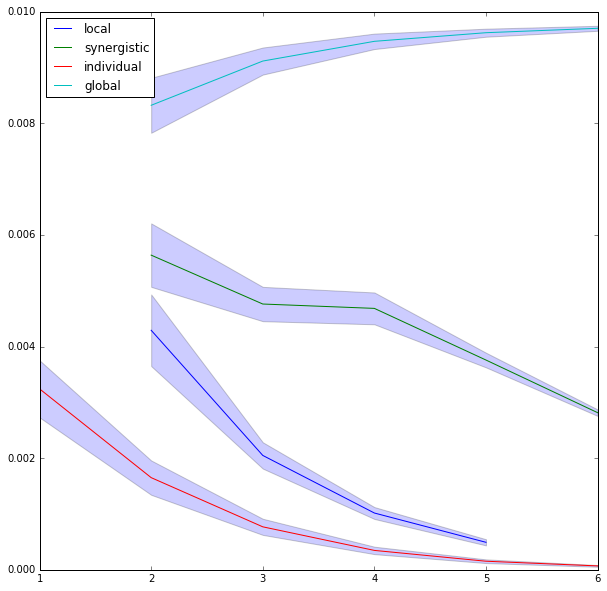

In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl
#%matplotlib notebook
#%matplotlib inline

#play with this for better figure sizes 
mpl.rcParams['figure.figsize'] = (10,10)
mpl.legend.loc = "upper_left"

plt.plot(plot_range_local_dirichlet, mean_local_dirichlet, label="local")
plt.plot(plot_range_synergistic_dirichlet, mean_synergistic_dirichlet, label="synergistic")
plt.plot(plot_range_individual_dirichlet, mean_individual_dirichlet, label="individual")
plt.plot(plot_range_global_dirichlet, mean_global_dirichlet, label="global")

lower_bound_synergistic_dirichlet = np.array(mean_synergistic_dirichlet)-np.array(std_synergistic_dirichlet)
upper_bound_synergistic_dirichlet = np.array(mean_synergistic_dirichlet)+np.array(std_synergistic_dirichlet)
plt.fill_between(plot_range_synergistic_dirichlet, lower_bound_synergistic_dirichlet, 
                 upper_bound_synergistic_dirichlet, 
                 alpha=0.2)

lower_bound_individual_dirichlet = np.array(mean_individual_dirichlet)-np.array(std_individual_dirichlet)
upper_bound_individual_dirichlet = np.array(mean_individual_dirichlet)+np.array(std_individual_dirichlet)
plt.fill_between(plot_range_individual_dirichlet, lower_bound_individual_dirichlet, 
                 upper_bound_individual_dirichlet, 
                 alpha=0.2)

lower_bound_global_dirichlet = np.array(mean_global_dirichlet)-np.array(std_global_dirichlet)
upper_bound_global_dirichlet = np.array(mean_global_dirichlet)+np.array(std_global_dirichlet)
plt.fill_between(plot_range_global_dirichlet, lower_bound_global_dirichlet, upper_bound_global_dirichlet, 
                 alpha=0.2)

lower_bound_local_dirichlet = np.array(mean_local_dirichlet)-np.array(std_local_dirichlet)
upper_bound_local_dirichlet = np.array(mean_local_dirichlet)+np.array(std_local_dirichlet)
plt.fill_between(plot_range_local_dirichlet, lower_bound_local_dirichlet, upper_bound_local_dirichlet, 
                 alpha=0.2)

plt.legend(loc="upper left")
plt.show()




# lower_bound_random_control = np.array(mean_random_control)-np.array(std_random_control)
# upper_bound_random_control = np.array(mean_random_control)+np.array(std_random_control)
# plt.fill_between(plot_range, lower_bound_random_control, upper_bound_random_control, 
#                  label='{}'.format("random control std"), alpha=0.2)




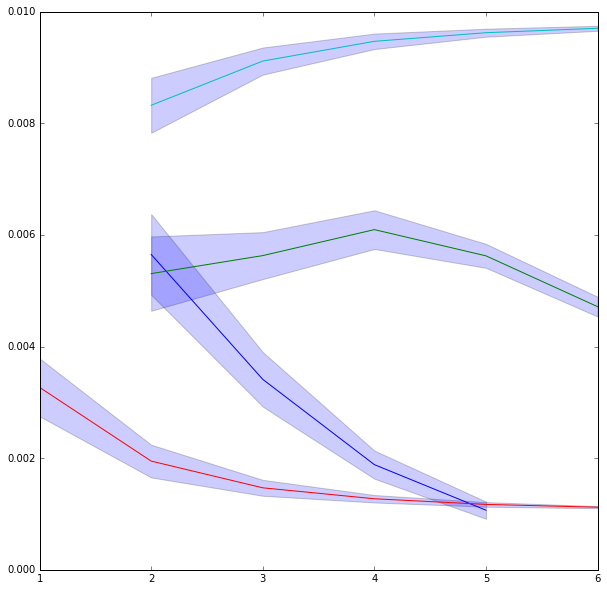

In [11]:
plt.plot(plot_range_local_entropy75, mean_local_entropy75, label="local")
plt.plot(plot_range_synergistic_entropy75, mean_synergistic_entropy75, label="synergistic")
plt.plot(plot_range_individual_entropy75, mean_individual_entropy75, label="individual")
plt.plot(plot_range_global_entropy75, mean_global_entropy75, label="global")

lower_bound_synergistic_entropy75 = np.array(mean_synergistic_entropy75)-np.array(std_synergistic_entropy75)
upper_bound_synergistic_entropy75 = np.array(mean_synergistic_entropy75)+np.array(std_synergistic_entropy75)
plt.fill_between(plot_range_synergistic_entropy75, lower_bound_synergistic_entropy75, 
                 upper_bound_synergistic_entropy75, 
                 label='{}'.format("random local std"), alpha=0.2)

lower_bound_individual_entropy75 = np.array(mean_individual_entropy75)-np.array(std_individual_entropy75)
upper_bound_individual_entropy75 = np.array(mean_individual_entropy75)+np.array(std_individual_entropy75)
plt.fill_between(plot_range_individual_entropy75, lower_bound_individual_entropy75, 
                 upper_bound_individual_entropy75, 
                 label='{}'.format("random local std"), alpha=0.2)

lower_bound_global_entropy75 = np.array(mean_global_entropy75)-np.array(std_global_entropy75)
upper_bound_global_entropy75 = np.array(mean_global_entropy75)+np.array(std_global_entropy75)
plt.fill_between(plot_range_global_entropy75, lower_bound_global_entropy75, upper_bound_global_entropy75, 
                 label='{}'.format("random local std"), alpha=0.2)

lower_bound_local_entropy75 = np.array(mean_local_entropy75)-np.array(std_local_entropy75)
upper_bound_local_entropy75 = np.array(mean_local_entropy75)+np.array(std_local_entropy75)
plt.fill_between(plot_range_local_entropy75, lower_bound_local_entropy75, upper_bound_local_entropy75, 
                 label='{}'.format("random local std"), alpha=0.2)

#plt.legend()
plt.show()
